In [1]:
import numpy as np
from keras import models as m
from keras import layers as l #installing all dependencies

Using TensorFlow backend.


In [31]:
from keras.datasets import mnist
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255  #importing and normalizing the dataset

In [32]:
X_train=x_train.reshape(x_train.shape[0],np.prod(x_train.shape[1:]))#reshaping training data

In [33]:
X_train.shape

(60000, 784)

In [34]:
X_test=x_test.reshape(x_test.shape[0],np.prod(x_test.shape[1:]))#reshaping testing data

In [35]:
X_test.shape

(10000, 784)

In [36]:
input_dim=784
encodings=64


In [37]:
inp=l.Input(shape=(input_dim,))
encoded=l.Dense(encodings,activation="relu")(inp)
decoded=l.Dense(input_dim,activation="relu")(encoded)
autoencoder=m.Model(inputs=inp,outputs=decoded)

In [38]:
autoencoder.compile(optimizer="adam",loss="mean_squared_error")

In [39]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 135us/step - loss: 0.0351 - val_loss: 0.0160
Epoch 2/50
48000/48000 [==============================] - 6s 133us/step - loss: 0.0131 - val_loss: 0.0112
Epoch 3/50
48000/48000 [==============================] - 7s 138us/step - loss: 0.0102 - val_loss: 0.0095
Epoch 4/50
48000/48000 [==============================] - 6s 133us/step - loss: 0.0091 - val_loss: 0.0088
Epoch 5/50
48000/48000 [==============================] - 7s 143us/step - loss: 0.0085 - val_loss: 0.0083
Epoch 6/50
48000/48000 [==============================] - 6s 135us/step - loss: 0.0082 - val_loss: 0.0081
Epoch 7/50
48000/48000 [==============================] - 6s 133us/step - loss: 0.0079 - val_loss: 0.0079
Epoch 8/50
48000/48000 [==============================] - 6s 129us/step - loss: 0.0078 - val_loss: 0.0078
Epoch 9/50
48000/48000 [==============================] - 4s 90us/step - loss: 0.0077 - val_loss: 0.00

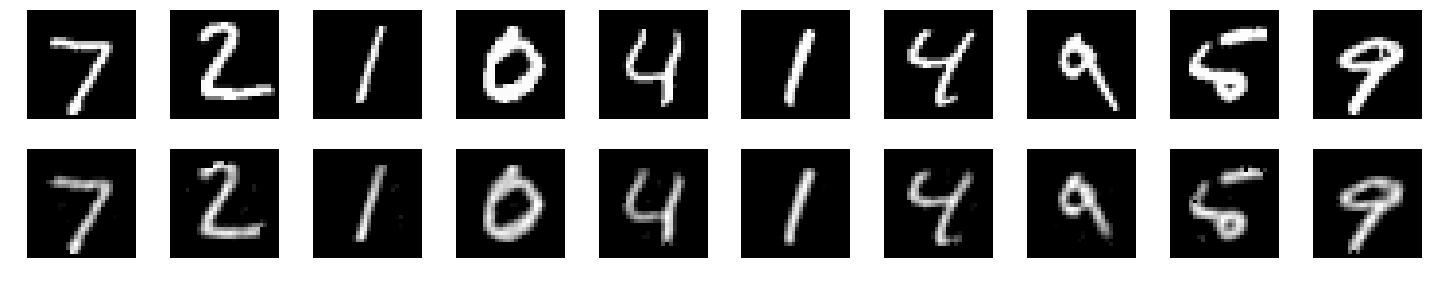

In [42]:
decoded_img=autoencoder.predict(X_test)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))

    plt.axis('off')

    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_img[i].reshape(28, 28))

    plt.axis('off')

plt.tight_layout()
plt.show()
